### Bhagyashree Deshpande

# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
# Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import datasets,tree,preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor,MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,ExtraTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.shape

(400, 11)

In [5]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Checking duplicate values

In [8]:
data[data.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [10]:
data['sales'] = (data['Sales'] > 7.49)*1

In [11]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [12]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [13]:
data.drop(['Sales'], axis = 1, inplace = True)

In [20]:
X = data.iloc[:,0:10]
y = data.iloc[:,10]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Building the Decision Tree Classifier Model

In [40]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

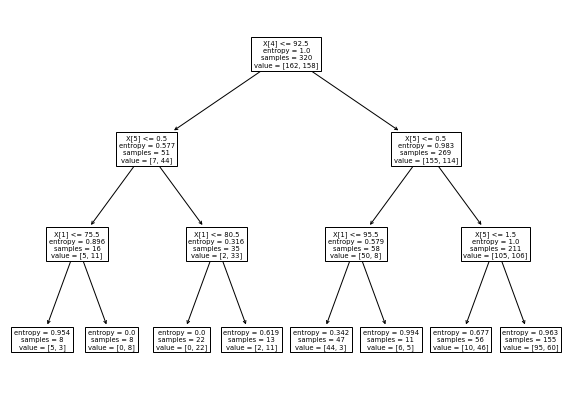

In [23]:
plt.figure(figsize=(10,7))
tree.plot_tree(model);

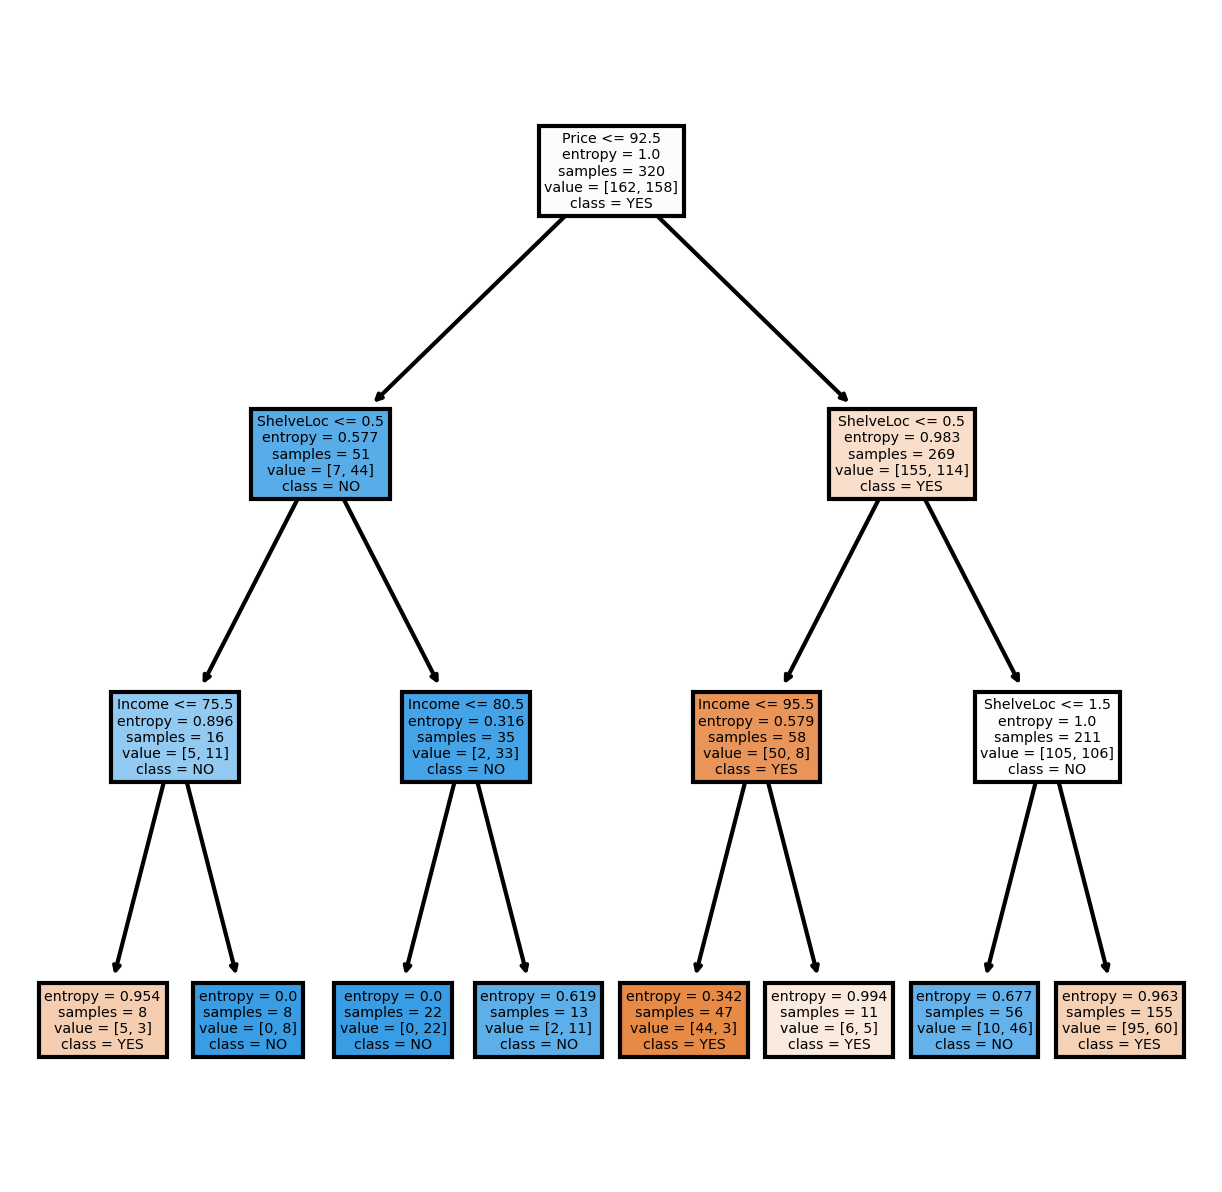

In [24]:
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'income']
cn = ['YES', 'NO']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [25]:
model.score(X_train, y_train)

0.740625

In [26]:
pred = model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.6875

In [36]:
y_pred = pred
print('Accuracy Score :', metrics.accuracy_score(y_test, y_pred))

Accuracy Score : 0.6875


In [35]:
print('Classification report :\n', classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.62      0.92      0.74        39
           1       0.86      0.46      0.60        41

    accuracy                           0.69        80
   macro avg       0.74      0.69      0.67        80
weighted avg       0.75      0.69      0.67        80



In [37]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth = max_depth, random_state = 40)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [38]:
accuracies = pd.DataFrame({'max_depth': range(1,11), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.621875,0.6000
1,2,0.625000,0.6750
2,3,0.740625,0.6875
3,4,0.768750,0.7375
4,5,0.871875,0.7750
5,6,0.887500,0.7875
6,7,0.906250,0.7250
7,8,0.943750,0.7500
8,9,0.962500,0.8125
9,10,0.978125,0.7750


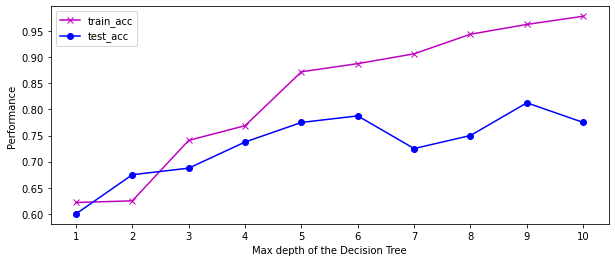

In [39]:
labels = ['train_acc', 'test_acc']
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot()

plt.plot(accuracies['max_depth'], accuracies['train_acc'], marker = 'x', color = 'm')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o', color = 'b')
ax.set_xticks(np.arange(1,11))

plt.legend(labels)
plt.xlabel('Max depth of the Decision Tree')
plt.ylabel('Performance')
plt.show()

## Conclusion

When the maximum depth of the decision tree is 9, the accuracy of the classification algorithm gives 81.25%. Hence, it is clear that the Decision Tree Classifier gives a good result for the salary data.

## ========================================================================

# Use decision trees to prepare a model on fraud data 
# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import datasets,tree,preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.shape

(600, 6)

In [6]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Making necessary EDA for the model

In [9]:
data[data.duplicated(keep = False)]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [11]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [12]:
data['Taxable.Income'] = (data['Taxable.Income'] > 30000) * 1

In [13]:
X = data.drop(axis = 1, columns = 'Taxable.Income')
y = data['Taxable.Income']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [15]:
model = DecisionTreeClassifier(criterion='gini', max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

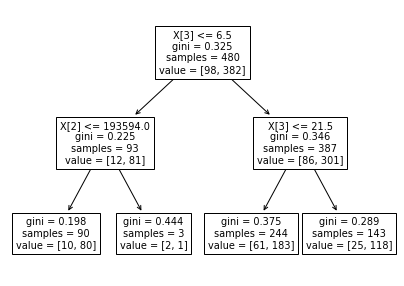

In [16]:
plt.figure(figsize=(7,5))
tree.plot_tree(model);

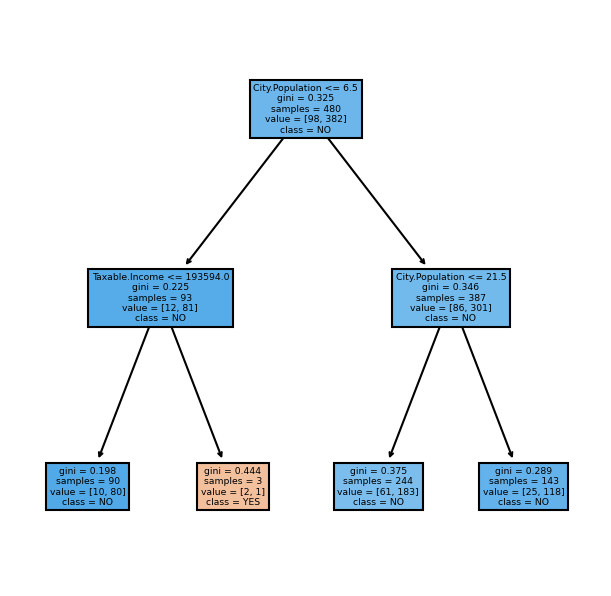

In [18]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience']
cn = ['YES', 'NO']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (5,5), dpi = 150)
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [19]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7979166666666667

In [20]:
model.score(X_test, y_test)

0.775

In [22]:
y_pred = model.predict(X_test)
print('Accuracy Score :', metrics.accuracy_score(y_test, y_pred))

Accuracy Score : 0.775


In [23]:
y_pred = model.predict(X_test)
print('Classification Report :\n', classification_report(y_test, y_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [26]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=40)
    model.fit(X_train, y_train)
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

In [27]:
accuracies = pd.DataFrame({'max_depth': range(1,11), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
accuracies

,max_depth,train_acc,test_acc
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.802083,0.775000
5,6,0.806250,0.775000
6,7,0.810417,0.766667
7,8,0.818750,0.741667
8,9,0.833333,0.750000
9,10,0.845833,0.750000


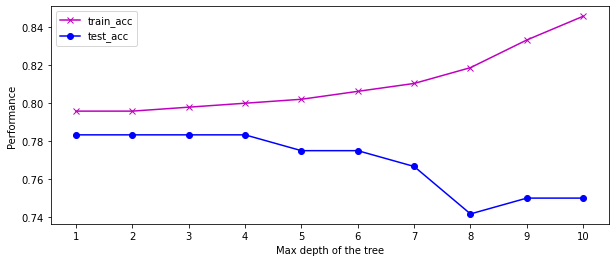

In [28]:
labels = ['train_acc', 'test_acc']
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot()

plt.plot(accuracies['max_depth'], accuracies['train_acc'], marker = 'x', color = 'm')
plt.plot(accuracies['max_depth'], accuracies['test_acc'], marker = 'o', color = 'b')
ax.set_xticks(np.arange(1,11))

plt.legend(labels)
plt.xlabel('Max depth of the tree')
plt.ylabel('Performance');

## Conclusion

When the maximum depth of the Decision Tree is 1,2,3,4, the accuracy of the classification algorithm gives 78.33%. Hence, it is clear that the Decision Tree Classifier gives a good result for the fraud check.